#Importando base de dados

In [ ]:
import pandas as pd

In [ ]:
import numpy as np


In [ ]:
dados = pd.read_csv('tips.csv')

In [ ]:
dados

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


In [ ]:
dados.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


#Tradução

In [ ]:
dados.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [ ]:
renomear = {'total_bill' : 'valor_da_conta',
            'tip' : 'gorjeta',
            'dessert' : 'sobremesa',
            'day' : 'dia_da_semana',
            'time' : 'hora_do_dia',
            'size' : 'total_de_pessoas'
    
}

In [ ]:
type(dados)

pandas.core.frame.DataFrame

In [ ]:
gorjetas = dados.rename(columns = renomear)

In [ ]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [ ]:
gorjetas.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
sim_nao = {
    'No' : 'Não',
    'Yes' : 'Sim'
}

In [ ]:
gorjetas.sobremesa.map(sim_nao)

0      Não
1      Não
2      Não
3      Não
4      Não
      ... 
239    Não
240    Sim
241    Sim
242    Não
243    Não
Name: sobremesa, Length: 244, dtype: object

In [ ]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2


In [ ]:
gorjetas.sobremesa = gorjetas.sobremesa.map(sim_nao)

In [ ]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Sun,Dinner,2


In [ ]:
gorjetas.dia_da_semana.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [ ]:
dias = {
    'Sun' : 'Domingo',
    'Sat' : 'Sábado',
    'Thur' : 'Quinta',
    'Fri' : 'Sexta'
}

In [ ]:
gorjetas.dia_da_semana.map(dias)

0      Domingo
1      Domingo
2      Domingo
3      Domingo
4      Domingo
        ...   
239     Sábado
240     Sábado
241     Sábado
242     Sábado
243     Quinta
Name: dia_da_semana, Length: 244, dtype: object

In [ ]:
gorjetas.dia_da_semana = gorjetas.dia_da_semana.map(dias)

In [ ]:
gorjetas.sample(4)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
165,24.52,3.48,Não,Domingo,Dinner,3
93,16.32,4.30,Sim,Sexta,Dinner,2
237,32.83,1.17,Sim,Sábado,Dinner,2
126,8.52,1.48,Não,Quinta,Lunch,2


In [ ]:
gorjetas.dia_da_semana.unique()

array(['Domingo', 'Sábado', 'Quinta', 'Sexta'], dtype=object)

In [ ]:
gorjetas.hora_do_dia.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [ ]:
hora = {
    'Dinner' : 'Jantar',
    'Lunch' : 'Almoço'
}

In [ ]:
gorjetas.hora_do_dia = gorjetas.hora_do_dia.map(hora)

In [ ]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2
1,10.34,1.66,Não,Domingo,Jantar,3
2,21.01,3.50,Não,Domingo,Jantar,3
3,23.68,3.31,Não,Domingo,Jantar,2
4,24.59,3.61,Não,Domingo,Jantar,4


#Importando o Seaborn

In [ ]:
!pip install seaborn==0.9.0

     |████████████████████████████████| 208 kB 27.5 MB/s 
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.2
    Uninstalling seaborn-0.11.2:
      Successfully uninstalled seaborn-0.11.2


In [ ]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
!pip show seaborn

Name: seaborn
Version: 0.9.0
Summary: seaborn: statistical data visualization
Home-page: https://seaborn.pydata.org
Author: Michael Waskom
Author-email: mwaskom@nyu.edu
License: BSD (3-clause)
Location: /usr/local/lib/python3.7/dist-packages
Requires: matplotlib, pandas, numpy, scipy
Required-by: missingno


#Análise 1 - Valor da conta e gorjeta

In [ ]:
gorjetas.columns

Index(['valor_da_conta', 'gorjeta', 'sobremesa', 'dia_da_semana',
       'hora_do_dia', 'total_de_pessoas'],
      dtype='object')

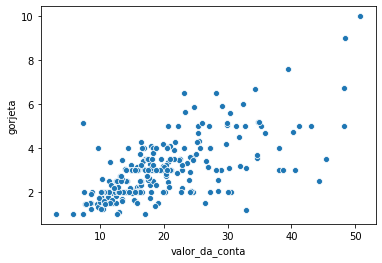

In [ ]:
valor_gorjeta = sns.scatterplot(x='valor_da_conta', y='gorjeta', data=gorjetas)

**Visualmente, o valor da gorjeta aumenta conforme o valor da conta também aumenta**

In [ ]:
print('A base de dados contém {} registros \n'.format(gorjetas.shape[0]))
print('Registros não nulos')
gorjetas.count()

A base de dados contém 244 registros 

Registros não nulos


valor_da_conta      244
gorjeta             244
sobremesa           244
dia_da_semana       244
hora_do_dia         244
total_de_pessoas    244
dtype: int64

#Criando o campo porcentagem

In [ ]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2
1,10.34,1.66,Não,Domingo,Jantar,3
2,21.01,3.50,Não,Domingo,Jantar,3
3,23.68,3.31,Não,Domingo,Jantar,2
4,24.59,3.61,Não,Domingo,Jantar,4


In [ ]:
gorjetas['porcentagem'] = gorjetas['gorjeta'] / gorjetas['valor_da_conta']

In [ ]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.059447
1,10.34,1.66,Não,Domingo,Jantar,3,0.160542
2,21.01,3.50,Não,Domingo,Jantar,3,0.166587
3,23.68,3.31,Não,Domingo,Jantar,2,0.139780
4,24.59,3.61,Não,Domingo,Jantar,4,0.146808


In [ ]:
gorjetas.porcentagem = gorjetas.porcentagem.round(2)

In [ ]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


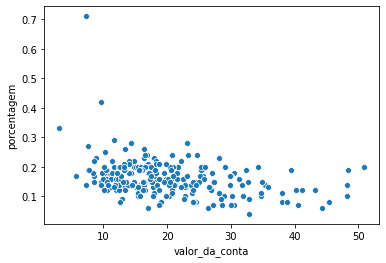

In [ ]:
porcentagem_conta = sns.scatterplot(x='valor_da_conta', y='porcentagem', data=gorjetas)

**Visualmente, o valor da gorjeta não é proporcional ao valor da conta, em porcentagem**

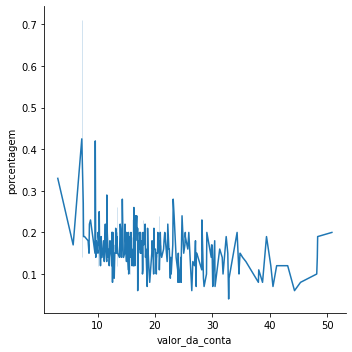

In [ ]:
porcentagem_conta_linha = sns.relplot(x='valor_da_conta', y='porcentagem', kind='line', data=gorjetas)

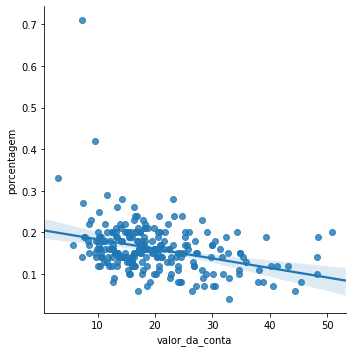

In [ ]:
sns.lmplot(x='valor_da_conta', y='porcentagem', data=gorjetas)

#Análise 2 - Sobremesa

In [ ]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06


In [ ]:
gorjetas[gorjetas.sobremesa=='Sim'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,0.163226
std,9.832154,1.401468,0.810751,0.085060
min,3.070000,1.000000,1.000000,0.040000
25%,13.420000,2.000000,2.000000,0.110000
50%,17.920000,3.000000,2.000000,0.150000
75%,26.860000,3.680000,3.000000,0.200000
max,50.810000,10.000000,5.000000,0.710000


In [ ]:
gorjetas[gorjetas.sobremesa=='Não'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,0.159536
std,8.255582,1.377190,1.017984,0.039889
min,7.250000,1.000000,1.000000,0.060000
25%,13.325000,2.000000,2.000000,0.140000
50%,17.590000,2.740000,2.000000,0.160000
75%,22.755000,3.505000,3.000000,0.185000
max,48.330000,9.000000,6.000000,0.290000


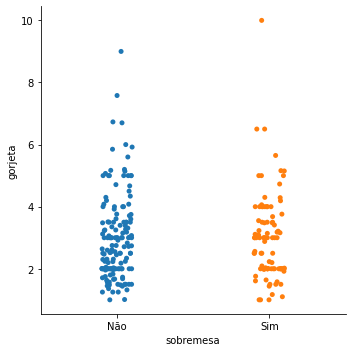

In [ ]:
sns.catplot(x='sobremesa', y='gorjeta', data=gorjetas)

#Visualmente, existe uma diferença no valor da gorjeta daqueles que pediram ou não a sobremesa 

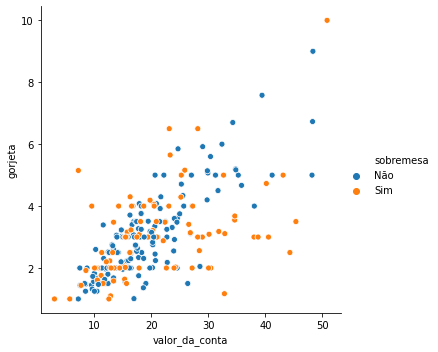

In [ ]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', data=gorjetas)

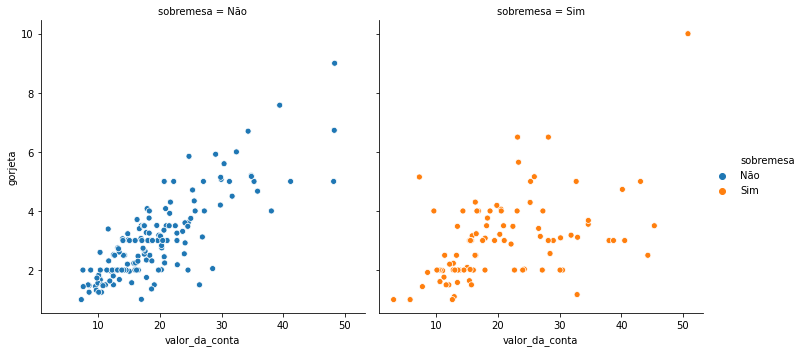

In [ ]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', col='sobremesa', data=gorjetas)

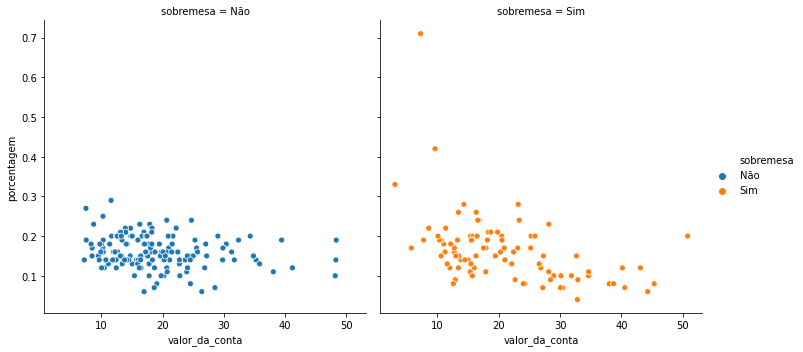

In [ ]:
sns.relplot(x='valor_da_conta', y='porcentagem', hue='sobremesa', col='sobremesa', data=gorjetas)

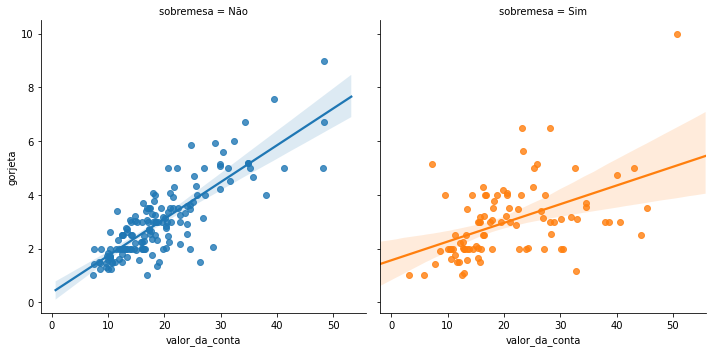

In [ ]:
sns.lmplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', col='sobremesa', data=gorjetas)

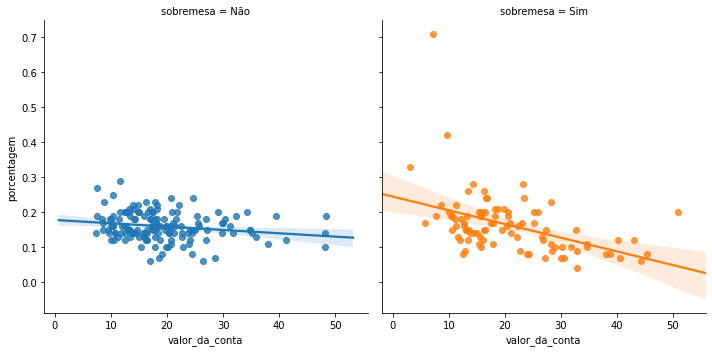

In [ ]:
sns.lmplot(x='valor_da_conta', y='porcentagem', hue='sobremesa', col='sobremesa', data=gorjetas)

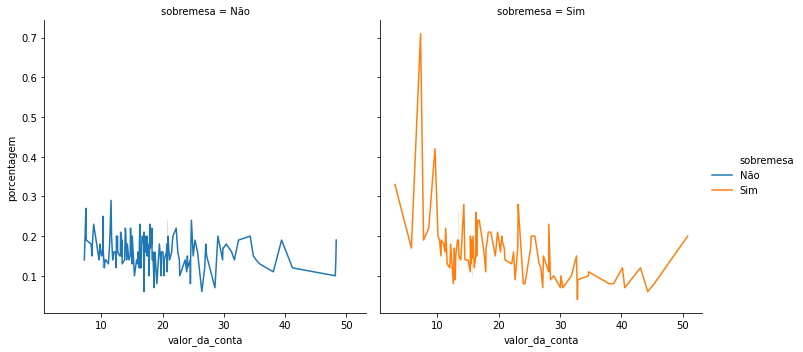

In [ ]:
sns.relplot(x='valor_da_conta', y='porcentagem', hue='sobremesa', col='sobremesa', kind='line', data=gorjetas)

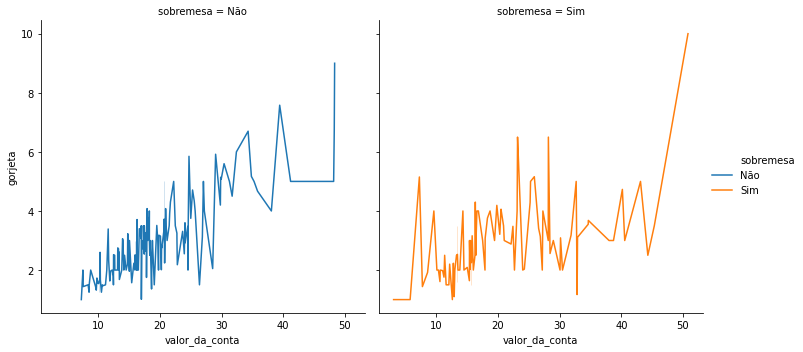

In [ ]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', col='sobremesa', kind='line', data=gorjetas)

#Teste de hipótese


**H<sup>null</sup>**

>**A distribuição do valor da gorjeta é a mesma nos dois grupos**

**H<sup>alt</sup>**

>**A distribuição do valor da gorjeta não é a mesma nos dois grupos**

In [ ]:
from scipy.stats import ranksums

In [ ]:
sobremesa = gorjetas.query("sobremesa == 'Sim'").porcentagem

In [ ]:
sem_sobremesa = gorjetas.query("sobremesa == 'Não'").porcentagem

In [ ]:
r=ranksums(sobremesa, sem_sobremesa)

In [ ]:
print('O valor do p-valor é {}'.format(r.pvalue))

O valor do p-valor é 0.5266635660124415


**A distribuição do valor da gorjeta é a mesma nos dois grupos**

#Análise 3 - Dia da semana

In [ ]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


In [ ]:
gorjetas.dia_da_semana.unique()

array(['Domingo', 'Sábado', 'Quinta', 'Sexta'], dtype=object)

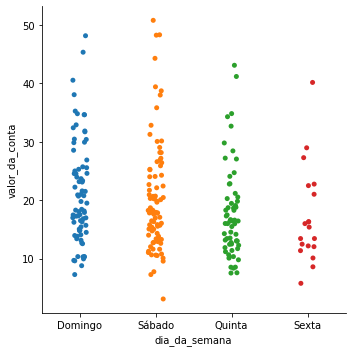

In [ ]:
sns.catplot(x='dia_da_semana', y='valor_da_conta', data=gorjetas)

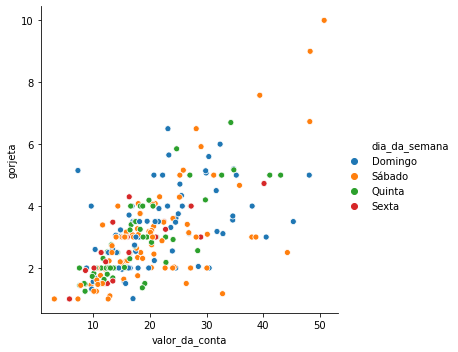

In [ ]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='dia_da_semana', data=gorjetas)

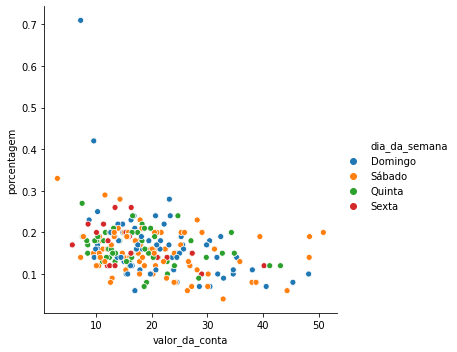

In [ ]:
sns.relplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', data=gorjetas)

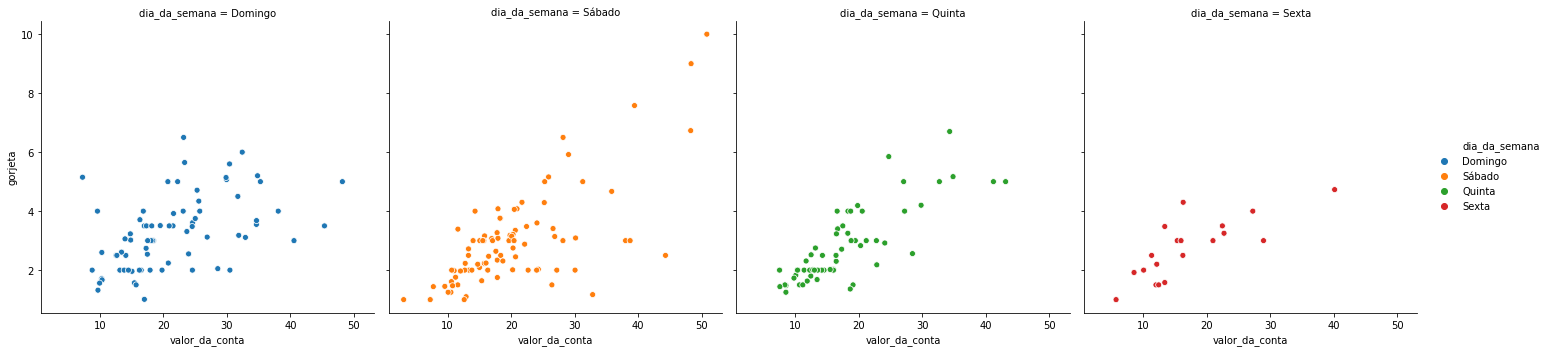

In [ ]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

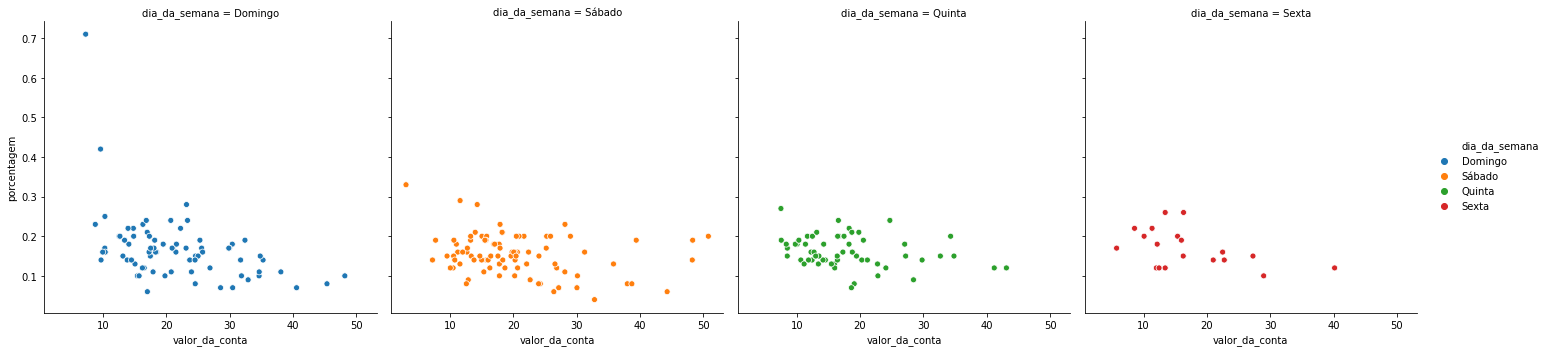

In [ ]:
sns.relplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

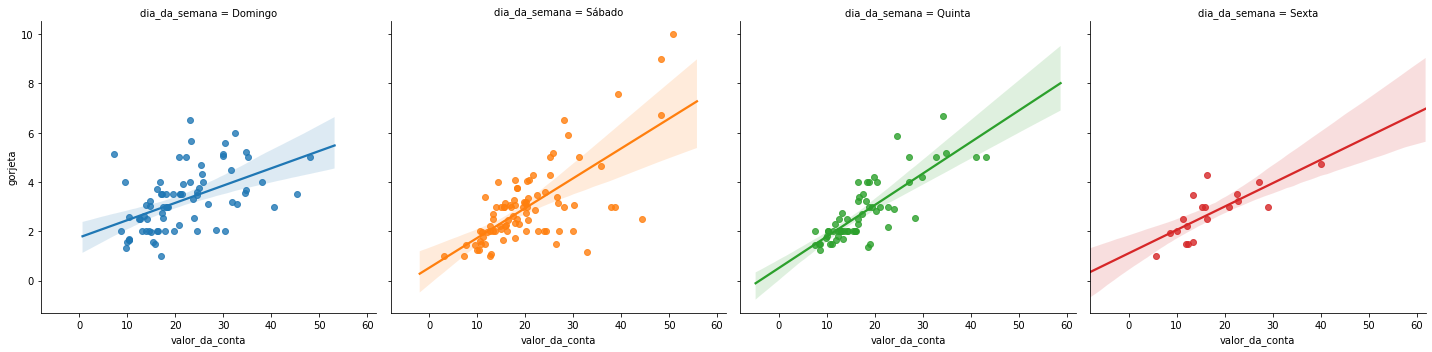

In [ ]:
sns.lmplot(x='valor_da_conta', y='gorjeta', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

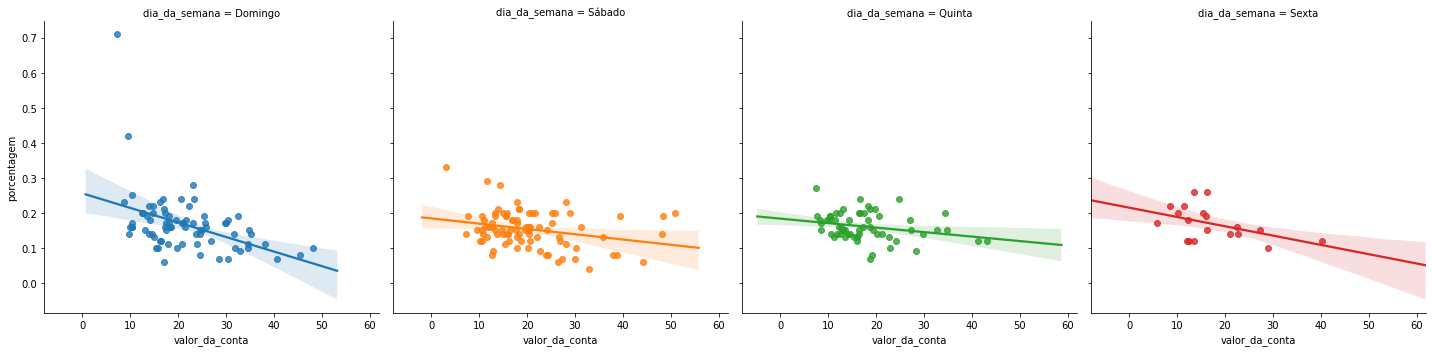

In [ ]:
sns.lmplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

In [ ]:
media_geral_gorjetas=gorjetas.gorjeta.mean()

In [ ]:
print('A média geral das gorjetas é de {}'.format(media_geral_gorjetas))

A média geral das gorjetas é de 2.9982786885245902


In [ ]:
gorjetas.groupby(['dia_da_semana']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]

,valor_da_conta,gorjeta,porcentagem
dia_da_semana,,,
Domingo,21.410000,3.255132,0.166974
Quinta,17.682742,2.771452,0.161129
Sexta,17.151579,2.734737,0.169474
Sábado,20.441379,2.993103,0.153678


In [ ]:
print('Frequência dos dias')
gorjetas.dia_da_semana.value_counts()

Frequência dos dias


Sábado     87
Domingo    76
Quinta     62
Sexta      19
Name: dia_da_semana, dtype: int64

##Teste de hipótese

**H<sup>null</sup>**

>**A distribuição do valor da conta é igual no sábado e no domingo**

**H<sup>alt</sup>**

>**A distribuição do valor da conta não é igual no sábado e no domingo**

In [ ]:
valor_conta_domingo=gorjetas.query("dia_da_semana=='Domingo'").valor_da_conta

In [ ]:
valor_conta_sabado=gorjetas.query("dia_da_semana=='Sábado'").valor_da_conta

In [ ]:
r2=ranksums(valor_conta_domingo,valor_conta_sabado)
print('O valor do p-value é {}'.format(r2.pvalue))

O valor do p-value é 0.3576728477868443


**H<sup>null</sup>**

>**A distribuição do valor da conta é igual no sábado e no domingo**

#Análise 4 - Hora do dia

In [ ]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06


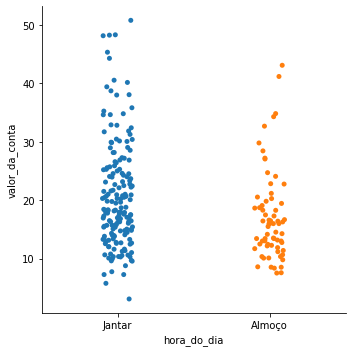

In [ ]:
sns.catplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

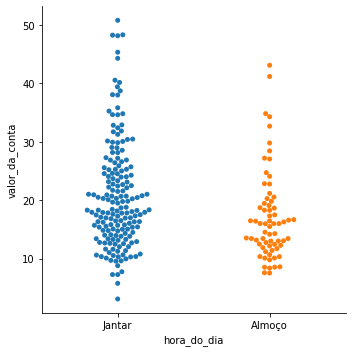

In [ ]:
sns.catplot(x='hora_do_dia', y='valor_da_conta', kind='swarm', data=gorjetas)

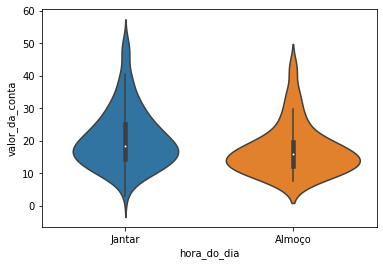

In [ ]:
sns.violinplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

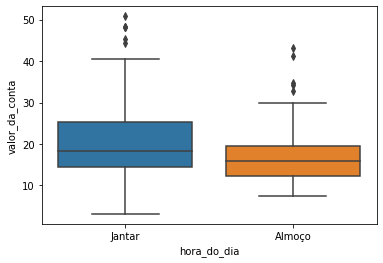

In [ ]:
sns.boxplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

In [ ]:
almoco=gorjetas.query("hora_do_dia =='Almoço'").valor_da_conta

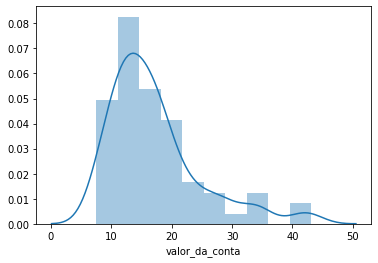

In [ ]:
sns.distplot(almoco)

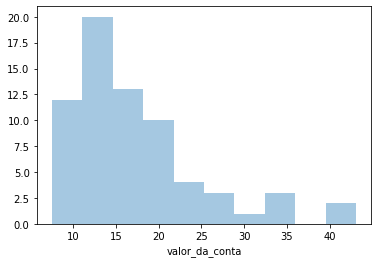

In [ ]:
sns.distplot(almoco, kde=False)

In [ ]:
jantar=gorjetas.query("hora_do_dia =='Jantar'").valor_da_conta

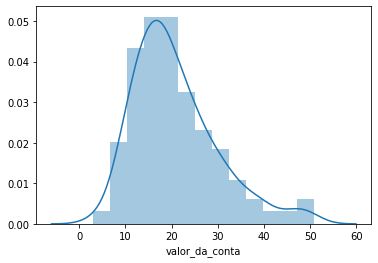

In [ ]:
sns.distplot(jantar)

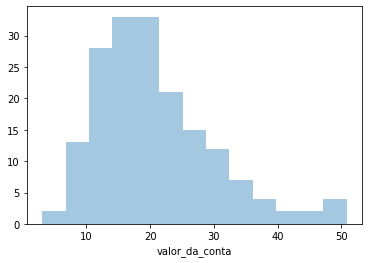

In [ ]:
sns.distplot(jantar, kde=False)

In [ ]:
gorjetas.groupby(['hora_do_dia']).mean()[['valor_da_conta','gorjeta','porcentagem']]

,valor_da_conta,gorjeta,porcentagem
hora_do_dia,,,
Almoço,17.168676,2.728088,0.163971
Jantar,20.797159,3.102670,0.159773


##Teste de hipótese


**H<sup>null</sup>**

>**A distribuição do valor da gorjeta é igual no almoço e no jantar**

**H<sup>alt</sup>**

>**A distribuição do valor da gorjeta não é igual no almoço e no jantar**

In [ ]:
r3 = ranksums(jantar, almoco)

In [ ]:
print('O valor do p-value é de {}'.format(r3.pvalue))

O valor do p-value é de 0.0011791039723641672


**H<sup>alt</sup>**

>**A distribuição do valor da gorjeta não é igual no almoço e no jantar**

##Teste de hipótese 2


**H<sup>null</sup>**

>**A distribuição da porcentagem da gorjeta é igual no almoço e no jantar**

**H<sup>alt</sup>**

>**A distribuição da porcentagem da gorjeta não é igual no almoço e no jantar**

In [ ]:
porcentagem_almoco=gorjetas.query("hora_do_dia=='Almoço'").porcentagem

In [ ]:
porcentagem_jantar=gorjetas.query("hora_do_dia=='Jantar'").porcentagem

In [ ]:
r4=ranksums(porcentagem_almoco, porcentagem_jantar)

In [ ]:
print('O valor do p-value é igual a {}'.format(r4.pvalue))

O valor do p-value é igual a 0.2602493995587126



**H<sup>null</sup>**

>**A distribuição da porcentagem da gorjeta é igual no almoço e no jantar**